In [175]:
%matplotlib inline
# first we ingest the data from the source on the web
# this contains a reduced version of the data set from Lending Club
import pandas as pd
# list of NA values
na_values = ['n/a']
loansData = pd.read_csv('../datasets/loansData.csv', na_values=na_values, dtype={'Employment.Length': str})
# Has NA.
loansData['Employment.Length'].unique()

array(['< 1 year', '2 years', '5 years', '9 years', '3 years', '10+ years',
       '8 years', '6 years', '1 year', '7 years', '4 years', nan], dtype=object)

In [176]:
loansData['Interest.Rate'][0:5]  # first five rows of Interest.Rate

81174     8.90%
99592    12.12%
80059    21.98%
15825     9.99%
33182    11.71%
Name: Interest.Rate, dtype: object

In [177]:
def fix_interest(rates):
    # Truncate the last character from every interest rate
    rates = rates.str.slice(0,-1)
    
    return rates

In [178]:
# First five rows after removing % signs from rates
loansData['Interest.Rate'].str.slice(0,-1)[0:5]

81174     8.90
99592    12.12
80059    21.98
15825     9.99
33182    11.71
Name: Interest.Rate, dtype: object

In [179]:
# Making changes in original data
loansData['Interest.Rate'] = fix_interest(loansData['Interest.Rate'])

In [180]:
loansData['Loan.Length'][0:5]

81174    36 months
99592    36 months
80059    60 months
15825    36 months
33182    36 months
Name: Loan.Length, dtype: object

In [181]:
def remove_months(loan):
    # Remove ' months' suffix from each row
    loan = loan.str.slice(0, -7)
    return loan

In [182]:
# Making changes in original data
loansData['Loan.Length'] = remove_months(loansData['Loan.Length'])
loansData['Loan.Length'][0:5]

81174    36
99592    36
80059    60
15825    36
33182    36
Name: Loan.Length, dtype: object

In [183]:
loansData['FICO.Range'][0:5] # first five rows of FICO.Range

81174    735-739
99592    715-719
80059    690-694
15825    695-699
33182    695-699
Name: FICO.Range, dtype: object

In [184]:
# Get all index for the series data
indices = loansData['FICO.Range'].index
count = 0
vals = {}
# Replace the categorical data with the middle value.
for x in loansData['FICO.Range']:
    low,high = x.split('-')
    mid = (int(low) + int(high))/2
    vals[indices[count]] = str(int(mid))
    count += 1
# Forming a series object and then assigning.
loansData['FICO.Range'] = pd.Series(vals,indices)
loansData['FICO.Range'][0:5]

81174    737
99592    717
80059    692
15825    697
33182    697
Name: FICO.Range, dtype: object

In [162]:
type(loansData['Loan.Length'])

pandas.core.series.Series

In [187]:
# Drop all rows with NAN value for Employment.Length.
loansData = loansData[pd.notnull(loansData['Employment.Length'])]

In [188]:
loansData['Employment.Length'].unique()

array(['< 1 year', '2 years', '5 years', '9 years', '3 years', '10+ years',
       '8 years', '6 years', '1 year', '7 years', '4 years'], dtype=object)

In [196]:
# managing outliers - remove row with monthly income > 100K
loansData = loansData[loansData['Monthly.Income'] < 100000]

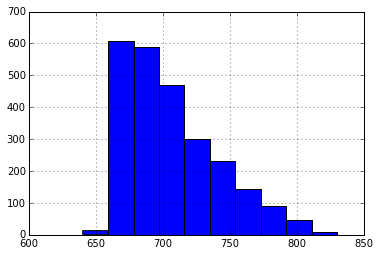

In [199]:
# With the distribution of FICO scores we see the histogram below.
import matplotlib.pyplot as plt
plt.figure()
loansmin = pd.read_csv('../datasets/loanf.csv')
fico = loansmin['FICO.Score']
p = fico.hist()

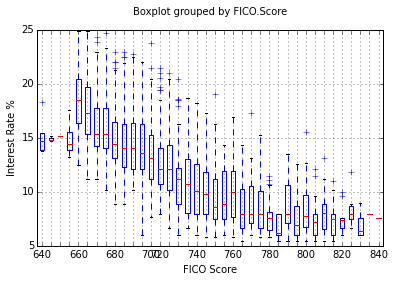

In [21]:
# BoxPlot
p = loansmin.boxplot('Interest.Rate','FICO.Score')
q = p.set_xticklabels(['640','','','','660','','','','680','','','','700',
  '720','','','','740','','','','760','','','','780','','','','800','','','','820','','','','840'])

q0 = p.set_xlabel('FICO Score')
q1 = p.set_ylabel('Interest Rate %')
q2 = p.set_title('                          ')

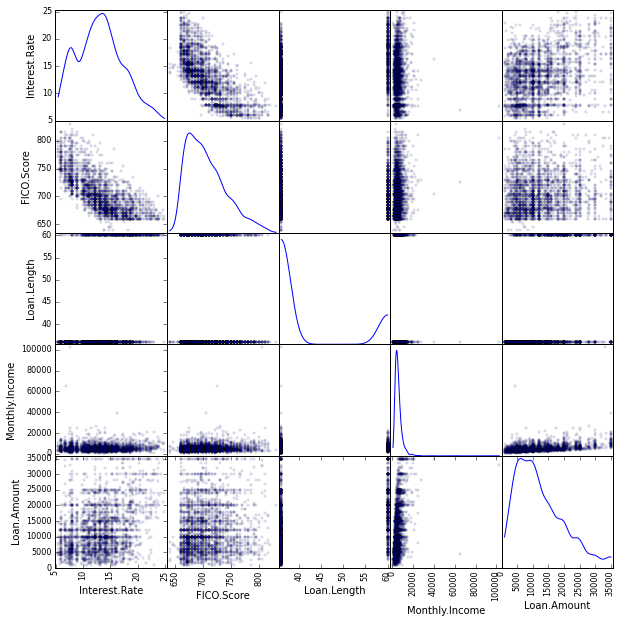

In [20]:
import pandas as pd
loansmin = pd.read_csv('../datasets/loanf.csv')
a = pd.scatter_matrix(loansmin,alpha=0.01,figsize=(10,10), diagonal='kde')